# Part 1: Audio 

In this notebook we first cover basics about sound.

Then we go on to experiment with sound via `PROGRAMMING CHALLENGES`. 

The *answers* to these challenges are located in the subfolder `reference_notebooks`. (If viewing via Jupyter Lab, click on the folder icon on the far left to see the folder structure.)

# **What is sound?**

**Basically, sound is the vibrations of air particles** (or water particles, etc.)

These vibrations cause higher and lower air pressure: the closer the air particles are together, the higher the pressure. 

For more on how these vibrations are caused, [this video](https://www.youtube.com/watch?v=24yESm63tSY) has nice visuals. For a more in-depth read, see [this informative post](https://www.ccohs.ca/oshanswers/phys_agents/noise_basic.html?=undefined&wbdisable=true).



## Hearing Sound

It is these air pressure fluctuations that our ears physically react to and transmit the information to our brains to process. In this sense, **sound is continuous and non-stopping**, at least in air. 

In space there is no sound, as not enough particles are there to transfer these vibrations.


## Recording Sound (Digitally)

To record sound, we measure the energy of the air particles in points of time with a microphone. Each measurement is a **sample**, and an entire recording is comprised of many **samples**. The more often we measure, the more detailed recording we have. How often we measure *per second* is termed **sampling rate** (or frame rate, or frequency rate). So, audio sampled at the rate of `16000` Hz has been measured 16000 times each second.

If we have only one microphone measuring sound, the recording has just **one channel**, e.g. is **mono sound**. However, if we use two microphones, each microphone collects samples, meaning that the recording has **two channels**, or is **stereo sound**. The number of channels indicates how many microphones were used to record a single sound. 

## Frequencies

Simply put, sound has high and low frequencies. 
- High frequency example: small [chirping bird](https://freesound.org/people/SpaceJoe/sounds/507267/). 
- Low frequency example: the hum of a [truck's engine](https://freesound.org/people/MarlonHJ/sounds/242740/). 

How high our **sampling rate** is determines up to which frequency we can possibly measure. This topic exceeds this notebook, but for more, see [this video on Sampling, Aliasing & Nyquist Theorem](https://www.youtube.com/watch?v=yWqrx08UeUs).

#### **As we continue, the terms above in bold may offer context as we work with sound.**

First we must install and import the necessary tools.

## Do we have the necessary dependencies?

In [ ]:
import sys
!{sys.executable} -m pip install scipy matplotlib "../soundpy/soundpy-0.1.0a4.tar.gz"

# Let's listen and look at the sound

In [42]:
import pathlib # package that handles pathways 
import scipy 
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio # this allows us to play audio
import numpy as np 

## IMPORTANT: PROTECT YOUR EARS!

Ensure your audio is lowered!

## Load the audio of a **Bird's** Song

In [3]:
bird_path = pathlib.Path("../audio/bird.wav")
sampling_rate_bird, samples_bird = wav.read(bird_path)

## What are `sampling_rate_bird` and `samples_bird`?

In [4]:
type(sampling_rate_bird)

int

In [5]:
sampling_rate_bird

22050

#### The `sampling_rate_bird` is an integer with the value`22050`.

This means that the collection of samples in `samples_bird` contains `22050` samples *per second*. 

In [6]:
type(samples_bird)

numpy.ndarray

In [7]:
samples_bird.shape

(69950,)

In [8]:
samples_bird.dtype

dtype('int16')

#### `samples_bird` is a [Numpy n-dimensional array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html), containing one array of `6,995` integer samples

This means that our sound has just one channel or collection of measurements. Because the samples are integers, their values do not contain a decimal point. The fact the samples are integers rather than floats will become important later. For more on integers vs floats, see the [documentation covering numeric types in Python](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex).

## What do the samples *sound* like?

In [9]:
Audio(samples_bird, rate=sampling_rate_bird)

## What do the samples **look** like?

We can plot the samples via [Matplotlib](https://matplotlib.org/).

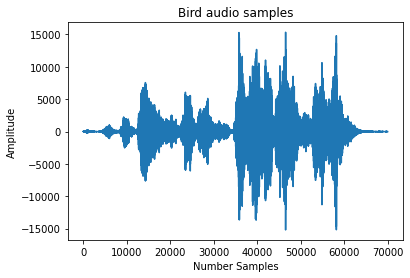

In [10]:
plt.plot(samples_bird)
plt.title("Bird audio samples")
plt.xlabel("Number Samples")
plt.ylabel("Amplitude")
plt.show()

# How long is this audio recording?

The x-axis currently informs us how many total samples make up this recording, close to `70,000`. We know that this audio contains `22050` samples each second. We can use this to calculate how long the audio is.

## PROGRAMMING CHALLENGE: Get length of audio in seconds

Use that knowledge to calculate the length of the audio in seconds.

In [11]:
def get_length_sec(samples, sampling_rate):
    
    
    time_sec = # YOUR CODE HERE
    
    
    return time_sec

In [12]:
get_length_sec(samples_bird, sampling_rate_bird)

3.1723356009070294

#### We will use that function to make our plots more informative

In [31]:
def plot_audio_sec(samples, sampling_rate):
    plt.clf()
    dur_sec = get_length_sec(samples, sampling_rate)
    x_axis_sec = np.linspace(0, dur_sec, int(np.floor(dur_sec*sampling_rate)))
    plt.plot(x_axis_sec, samples)
    plt.xlabel("time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

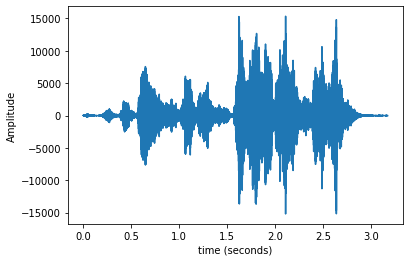

In [32]:
plot_audio_sec(samples_bird, sampling_rate_bird)

## Let's zoom in

I want to see what these samples look like close up. We can use [Numpy indexing and slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) to section up our audio samples.

In [33]:
beg_samps = samples_bird[:sampling_rate_bird//200]

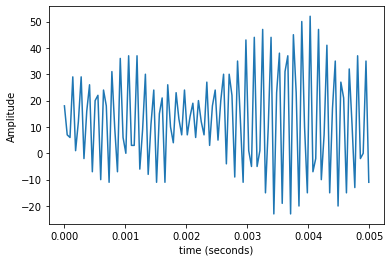

In [34]:
plot_audio_sec(beg_samps, sampling_rate_bird)

### Ooooh... these samples are not centered around zero. Let's fix that.

## Normalize audio --> zero mean and unit variance

In the function below, we will subtract the mean and divide by the standard deviation of the samples. This will normalize our signal to have `zero mean` and `unit variance`. 

In [37]:
def zero_mean_uni_variance(samples: np.ndarray):
    '''Normalizes samples to have zero mean and unit variance.
    
    Parameters
    ----------
    samples: np.ndarray
        Audio samples to apply normalization to
        
    Resources
    ---------
    HuggingFace:
        https://github.com/huggingface/transformers/blob/master/src/transformers/
        models/wav2vec2/feature_extraction_wav2vec2.py#L82
    '''
    eps = 2**-52
    x = samples.copy()
    normed_samples = (x - x.mean()) / (np.std(x) + eps)
    return normed_samples

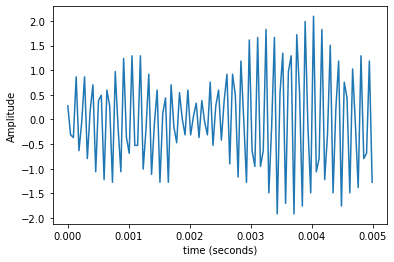

In [38]:
plot_audio_sec(zero_mean_uni_variance(beg_samps), sampling_rate_bird)

Nice. That looks better.

We mentioned at the beginning that sound is just vibrating air particles. Microphones measure the resulting changes of air pressure, which can be better visualized in this plot because the sound wave is easier to see zoomed in. 

Where the line is above zero, the air particles are closer together / the air pressure is higher. Where the line is below zero, the air particles are farther apart / the air pressure is lower. 

Energy hitting air particles (i.e. sound) is a little bit like someone knocking a pendulum. It will swing one direction (hitting other pendulums in this example), and then it will swing back, and forth, and back, until it settles back down in the middle again.

## Sampling Rate

Let's increase and decrease the sampling rate to see *and hear* how that influences the audio.

## PROGRAMMING CHALLENGE: Resample Audio

Hint: we need to know how many samples should be in the signal, given its length in seconds. The value must be an integer.

In [43]:
def resample_audio(samples, sr_old, sr_new):
    data = samples.copy()
    time_sec = len(data)/sr_old 
    
    
    num_samples = # Your code here
    
    
    assert type(num_samples) == int
    data = scipy.signal.resample(data, num_samples)
    return data, sr_new

## Does the function work? 

To check, we will ensure the resampled audio and the original audio have the same length.

In [ ]:
new_sampling_rate = 16000

samples_bird_resampled, sampling_rate_bird_resampled = resample_audio(
    samples_bird, 
    sampling_rate_bird, 
    new_sampling_rate)

In [88]:
len(samples_bird)/sampling_rate_bird

3.1723356009070294

In [89]:
len(samples_bird_resampled)/sampling_rate_bird_resampled

3.17225

In [91]:
assert round(len(samples_bird)/sampling_rate_bird,4) == round(len(samples_bird_resampled)/sampling_rate_bird_resampled,4)

## Let's plot and hear how the signal changes

How does it sound when you decrease the sampling rate vs when you increase it?

In [93]:
print(f"Original sampling rate: {sampling_rate_bird}")

Original sampling rate: 22050


New sampling rate: sampling_rate_bird_resampled


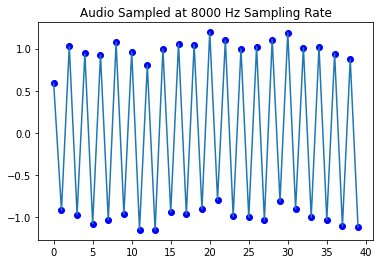

In [92]:
new_sampling_rate = 8000 # <----- Adjust this value: common sampling rates: 8000, 16000, 22050, 44100, 48000

samples_bird_resampled, sampling_rate_bird_resampled = resample_audio(
    samples_bird, 
    sampling_rate_bird, 
    new_sampling_rate)

print(f"New sampling rate: sampling_rate_bird_resampled")
beg_samps_resampled = samples_bird_resampled[:sampling_rate_bird_resampled//200]
plt.plot(zero_mean_uni_variance(beg_samps_resampled), "bo")
plt.plot(zero_mean_uni_variance(beg_samps_resampled))
plt.title(f"Audio Sampled at {new_sampling_rate} Hz Sampling Rate")
plt.show()
Audio(samples_bird_resampled, rate = sampling_rate_bird_resampled)

## How does sampling rate influence speech?

In [72]:
speech_sampling_rate, speech = wav.read("../audio/python.wav")

In [73]:
speech_sampling_rate

16000

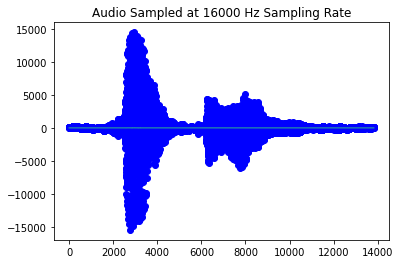

In [95]:
new_sampling_rate = 16000 # <----- Adjust this value: common sampling rates: 8000, 16000, 22050, 44100, 48000

speech_resampled, sampling_rate_speech_resampled = resample_audio(speech, speech_sampling_rate, new_sampling_rate)
beg_samps_resampled = speech_resampled[:sampling_rate_speech_resampled//200]
plt.plot(speech_resampled, "bo")
plt.plot(zero_mean_uni_variance(speech_resampled))
plt.title(f"Audio Sampled at {new_sampling_rate} Hz Sampling Rate")
plt.show()
Audio(speech_resampled, rate = sampling_rate_speech_resampled)

# Visualize the Frequencies

In order to know exactly which frequencies are in our signals, we need to apply the [Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/). This is a little complicated to apply for this workshop, so I will import a version of my own package called SoundPy. 

The tried and tested package [Librosa](https://librosa.org/doc/latest/index.html) also offers this functionality; however can be somewhat cumbersome to install in some environments. **Librosa is one of my favorite packages!!** You need this package if you are into sound. 

Anyways, in this section we will look at audio as short-time Fourier transform (**STFT**), which is basically when the Fourier Transform is applied to audio in small windows. This captures changes in the signal.

In [98]:
import soundpy as sp

## Visualizing the Fourier Transform

The Fourier Transform allows us to *see* the frequencies in the signal. 

If applied to an entire audio signal, **all at once**, this is what it will look like:

### Frequencies in Speech

In [114]:
fft_window_length = int(len(speech)/speech_sampling_rate*1000) # window applying Fourier Transform covers entire signal.

stft_speech = sp.feats.get_stft(
    speech, 
    sr=speech_sampling_rate, 
    win_size_ms=fft_window_length,
    percent_overlap=0,
    fft_bins=sr_bird2,
    zeropad=False,
)

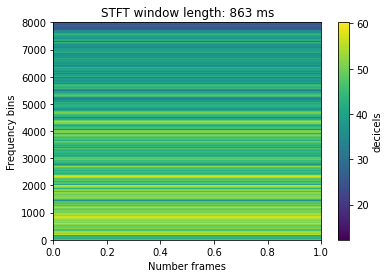

In [115]:
sp.feats.plot(stft_speech, feature_type="stft", title=f"STFT window length: {fft_window_length} ms")

## PROGRAMMING CHALLENGE: Experiment with the window size

Hint: for speech recognition, window sizes are smaller; for voice activity detection or noise classification, window sizes can be larger.

**Why do you think that is?**

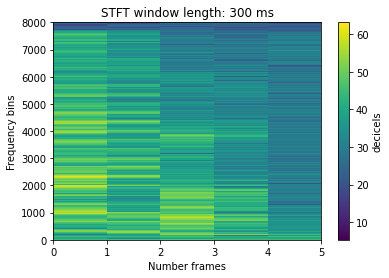

In [119]:
fft_window_length = 300  # <------ EXPERIMENT WITH THIS VALUE. 

stft_speech = sp.feats.get_stft(
    speech, 
    sr=speech_sampling_rate, 
    win_size_ms=fft_window_length,
    fft_bins=sr_bird2,
)
sp.feats.plot(
    stft_speech, 
    feature_type="stft", 
    title=f"STFT window length: {fft_window_length} ms")

## Compare this speech signal with that of a truck

Would the same window size be appropriate for the speech audio as for the truck audio?

In [122]:
sampling_rate_truck, samples_truck = wav.read("../audio/truck.wav")

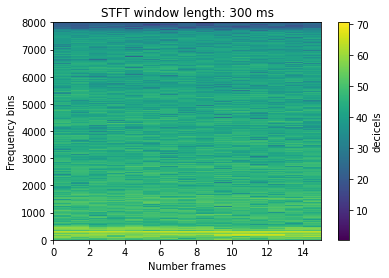

In [125]:
fft_window_length_truck = 300  # <------ EXPERIMENT WITH THIS VALUE

stft_truck = sp.feats.get_stft(
    samples_truck, 
    sr=sampling_rate_truck, 
    win_size_ms=fft_window_length_truck,
    fft_bins=sr_bird2,
)
sp.feats.plot(
    stft_truck, 
    feature_type="stft", 
    title=f"STFT window length: {fft_window_length_truck} ms")

### Now..... what happens when we downsample and then upsample again?

Let's downsample the speech to `8000` Hz (the sampling rate for telephone calls), then upsample back to `16000` Hz and visualize the results.

In [128]:
speech_downsampled, speech_sampling_rate_downsampled = resample_audio(
    speech, 
    speech_sampling_rate, 
    8000)

In [129]:
speech_upsampled, speech_sampling_rate_upsampled = resample_audio(
    speech_downsampled, 
    speech_sampling_rate_downsampled, 
    16000)

In [146]:
stft_speech_upsampled = sp.feats.get_stft(
    speech_upsampled, 
    sr=speech_sampling_rate_upsampled, 
    fft_bins=speech_sampling_rate_upsampled)

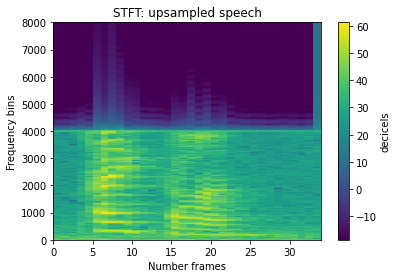

In [147]:
sp.feats.plot(
    stft_speech_upsampled, 
    feature_type="stft", 
    title="STFT: upsampled speech")

In [131]:
Audio(speech_upsampled, rate=speech_sampling_rate_upsampled)

In [148]:
stft_speech_original = sp.feats.get_stft(
    speech, 
    sr=speech_sampling_rate, 
    fft_bins=speech_sampling_rate)

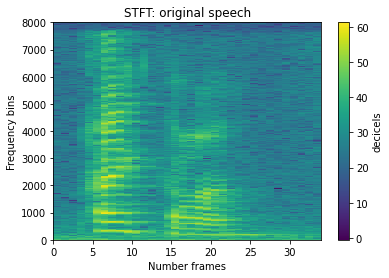

In [149]:
sp.feats.plot(
    stft_speech_original, 
    feature_type="stft", 
    title="STFT: original speech")

In [132]:
Audio(speech, rate=speech_sampling_rate)

### The original signal sounds much better even though they both technically have the same sampling rate.

# END OF PART 1! 

### The rest of this notebook is for those who want to continue working with audio.

This notebook should have provided you more context for working with sound. If you would like to learn further, there are more programming challenges below.

## PROGRAMMING CHALLENGE: Manipulate the sound

Here I offer some ideas for how you can play with sounds. **Feel free to create new "cells" and build your own functions!**

The goal is to have a bit of fun and also to get an idea of what you can do with Numpy, sound, etc.

### Adjust the volume

In [132]:
def adjust_volume(samples, amount):
    samps = samples.copy()
    
    
    # Your code here
    
    
    return samps

In [133]:
truck_quiet = adjust_volume(samples_truck, 0.1)

In [134]:
Audio(addsounds(samples_bird_resampled, truck_quiet), rate=sampling_rate_truck)

### Mirror your sound

Hint: [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

More hints will spoil the fun. Numpy helps *flipping* things around though...

In [108]:
def mirror_sound(samples):
    
    
    # Your code here
    
    
    return mirrored_samples

In [109]:
speech_mirrored = mirror_sound(samples_speech)

In [110]:
Audio(speech_mirrored, rate=sr_speech)

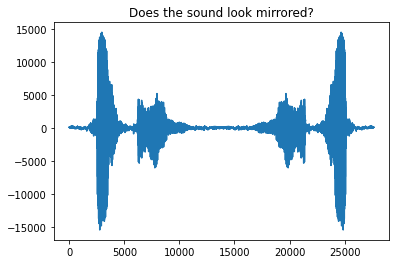

In [112]:
plt.clf()
plt.plot(speech_mirrored)
plt.title("Does the sound look mirrored?")
plt.show()

### Add sounds together

This can be more challenging than you expect. Lengths have to be aligned.. and sampling rates should also be the same.

In [170]:
def addsounds(samples1, samples2):
    
    
    # Your code here
    
    
    return samples1 + samples2[:len(samples1)]

In [171]:
bird_truck = addsounds(samples_bird_resampled, samples_truck)

In [174]:
Audio(bird_truck, rate=sampling_rate_bird_resampled)

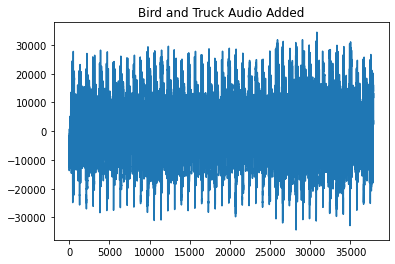

In [176]:
plt.clf()
plt.plot(bird_truck)
plt.title("Bird and Truck Audio Added")
plt.show()

### Repeat your sound

In [113]:
def repeat_audio(samples, repeat_n_times = 2):
    # ensure not to manipulate original data
    samps_copy = samples.copy()
    
    
    # Your code here

    
    return samples_repeated

In [114]:
birds_repeated = repeat_audio(samples_bird, repeat_n_times=3)

In [115]:
Audio(birds_repeated, rate=sampling_rate_bird)

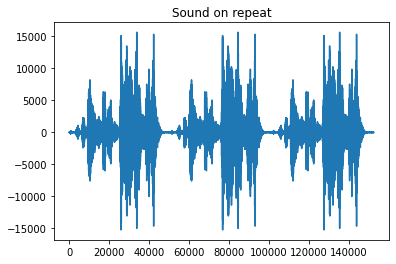

In [117]:
plt.clf()
plt.plot(birds_repeated)
plt.title("Sound on repeat")
plt.show()

## PROGRAMMING CHALLENGE: Normalize Audio between -1 and 1

Machines perform better when audio samples remain between -1 and 1. Let's look at the max and min values of the bird audio:

In [ ]:
samples_bird.max()

15347

In [23]:
samples_bird.min()

-15199

Complete this function to normalize the audio to be between -1 and 1.

In [133]:
def norm_samples(samples):
    """Scales the sound to be between -1 and 1.
    """
    x = samples.copy()
    
    
    # YOUR CODE HERE
    
    
    return normed_samples

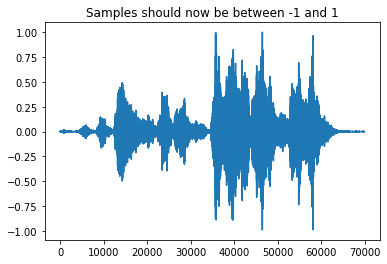

In [134]:
plt.plot(norm_samples(samples_bird))
plt.title("Samples should now be between -1 and 1")
plt.show()

## Compare Normalization Across Audio Files

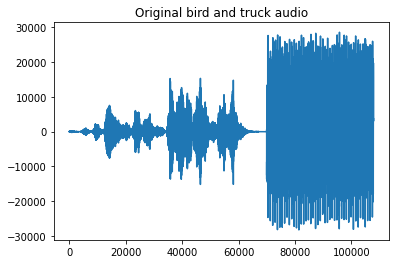

In [181]:
plt.plot(np.concatenate([samples_bird,samples_truck]))
plt.title("Original bird and truck audio")
plt.show()

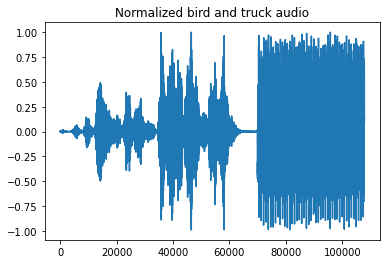

In [182]:
plt.plot(np.concatenate(
    [norm_samples(samples_bird),norm_samples(samples_truck)]
))
plt.title("Normalized bird and truck audio")
plt.show()

Are their volume differences upheld?

## PROGRAMMING CHALLENGE: Normalize Audio between -1 and 1, uphold original volume

Hint 1: [Max and min values for audio dtypes](https://docs.cognitive-ml.fr/shennong/python/audio.html)

Hint 2: [Numpy dtype](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html)

In [138]:
def norm_samples_original_volume(samples):
    """Scales the sound to be between -1 and 1.
    """
    x = samples.copy()
    
    
    # YOUR CODE HERE
    
    
    return normalized_samples

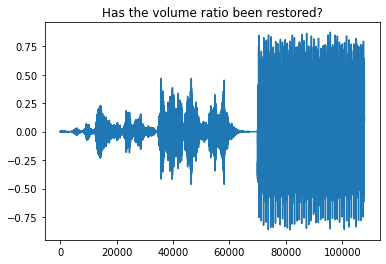

In [153]:
plt.plot(np.concatenate(
    [norm_samples_original_volume(samples_bird),norm_samples_original_volume(samples_truck)]
))
plt.title("Has the volume ratio been restored?")
plt.show()

## PROGRAMMING CHALLENGE: Make stereo sound mono

Currently, most deep learning applications expect mono sound.

Build a function that turns stereo sound into mono sound, or single channel audio.

In [158]:
alarm_path = pathlib.Path("../audio/alarm.wav")

In [160]:
sampling_rate_alarm, alarm = wav.read(alarm_path)

/tmp/ipykernel_7588/2155690753.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr_alarm, alarm = wav.read(alarm_path)


In [161]:
alarm.shape

(31864, 2)

In [104]:
def stereo2mono(samples):
    data = samples.copy()
    if np.argmax(data.shape) != 0:
        import warnings
        msg = "Sample data expects (num_samples, num_channels). "+\
            f"Data supplied has the shape {data.shape}, which looks like "+\
                "(num_channels, num_samples). Perhaps check your audio."
        warnings.warn(msg)
        
        
    # Your code here
    
    
    return data

In [105]:
alarm_mono = stereo2mono(alarm)

In [106]:
alarm_mono.shape

(31864,)

# STFT is great but cost intensive

When training algorithms, the size of data we use is very important. The data should be as small as possible, while still providing meaningful information for the algorithm to learn.

For many machine learning models, the raw audio signal and STFT features are *too complex*. 

## FBANK and MFCC features

The log Mel filter-bank (**FBANK**) and Mel-frequency cepstral coefficient (**MFCC**) features are frequency-based features but much smaller than the STFT.

Long story short, math is applied to reduce their size.

For more background on these features, you can check out a [post I put together](https://a-n-rose.github.io/2019/02/06/python-train-cnn-lstm-speech-features/) a while back. 

Let's visualize!

### FBANK

In [142]:
fbank_speech = sp.feats.get_fbank(speech, speech_sampling_rate)

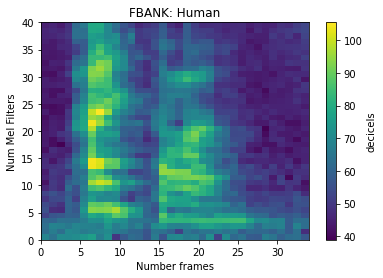

In [143]:
sp.feats.plot(fbank_speech, feature_type="fbank", title="FBANK: Human")

### MFCC

In [179]:
mfcc_speech = sp.feats.get_mfcc(speech, sr=speech_sampling_rate, num_mfcc=13)

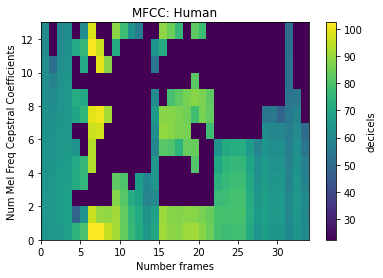

In [180]:
sp.feats.plot(mfcc_speech, feature_type="mfcc", title="MFCC: Human")

## PROGRAMMING CHALLENGE: Visualize features according to research

Use [this paper](https://hal.inria.fr/hal-02907929/document), *Achieving Multi-Accent ASR via Unsupervised Acoustic
Model Adaptation* (2020) as a reference and try to visualize the features they used.

See section `3.2. Acoustic Model and Lexicon`:

```
The TDNN acoustic model takes 40 mel frequency cepstral co-
efficients (MFCCs) over 25 ms frames with 10 ms stride as in-
puts. 
```

In [98]:
mfcc_paper = sp.feats.get_mfcc(
    samples_speech,
    sr_speech, 
    num_mfcc=None, # <------ Adjust this value: number mel frequency cepstral coefficients
    win_size_ms=None, # <------ Adjust this value: aka 'frame length'
    percent_overlap=None, # <------ Adjust this value: aka 'stride', aka 'hop length', aka 'window shift'
)

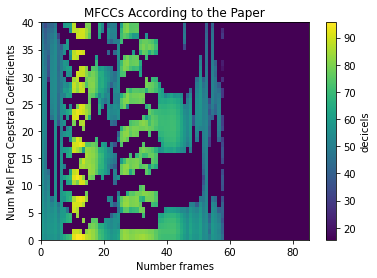

In [99]:
sp.feats.plot(mfcc_paper, feature_type="mfcc", title="MFCCs According to the Paper")